# **가설 5** : 교육과정, 입시제도의 변화와 사교육, 학업 성취도의 관계
매번 정권이 바뀌면서 우리나라의 교육과정은 잦은 풍파를 맞이한다. 

2006년 제 7차 교육과정이 개정된 이후 급변하는 교육과정에 날선 시선이 집중되었고, 정부는 이를 회피하기 위해 09개정, 15개정, 22개정 등의 연도별 개정으로 명칭만 바꾼채로 빈번한 개정을 시행했다.

논란이 되거나 큰 사건으로는 점점 줄어드는 수학 과목 시험 범위, 국어, 영어 수준별 평가(A/B형) 진행, 한국사 필수과목 및 절대평가 진행, 영어 절대평가 진행, 문이과 통합 및 수학 선택과목 다변화 등이 있다. 

입시제도 역시 논술제도의 축소, 수능 최저등급의 감소, 정시와 수시 비율의 변화 등 다양한 변화가 진행된다.

이에 따라 여러가지 가설을 세울 수 있는데, 가령 수학 범위가 줄어들었으니 수학에 대한 부담이 줄어들어 사교육비가 줄어들거나, 학업 성취도에 변화가 있을 것이다 등 따위다.

그러나 위의 가설은 틀렸다. 코로나로 인해서인지 알 수는 없으나, 최근 사교육비가 반등했다는 뉴스가 한 번 휩쓸고 갔다. 

이처럼 '교육과정과 입시제도의 변화'는 사교육비와 학업 성취도 데이터 등으로 입증되거나 반증될 수 있는데, 우리나라의 주된 교육과정 변천사를 통해 여러 가설을 세워보고 이를 증명해보고자 한다.

가설은 아래와 같다.(수정 중)

> **가설 5-1 :** 영어 절대 평가는 학생의 영어 성취도를 낮추고, 국어 수학 등 타과목 사교육비를 증대시켜 총 사교육비의 총량은 변함이 없을 것이다.

=> 영어 성취도도 낮추고, 영어 사교육비도 늘어났다.

> **가설 5-2 :** 점점 범위가 줄어드는 수학 범위는 수학 성취도를 낮추고 수학 사교육비를 감소시켜 총 사교육비의 총량은 감소할 것이다.

=> 수학 성취도도 낮추고, 수학 사교육비도 늘어났다.

> **가설 5-3 :** 2016년에는 무슨 일이 있었기에, 사교육 참가율은 반등하고 학업 성취도는 하락했는가?

=> 추측 1. 인강 시장의 대두(메가스터디 주가)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
from glob import glob
import folium
import json
import requests

In [2]:
file_names = sorted(glob('dataset/2011*.xlsx'))
file_names

['dataset\\2011~2020 학업성취도 평가 고등학생.xlsx',
 'dataset\\2011~2020 학업성취도 평가 중학생.xlsx']

## 2011~2020 학업 성취도 평가 EDA
**데이터 소개**
- 평가원에서 매년 발간되는 교육 평가 보고서에서 가져옴
- 중학교 3학년과 고등학교 1학년을 대상으로 매년 진행되는 학업 성취도 평가 데이터(집계자료)
- 2009~2015년은 전수조사, 2016년~2020년은 표본조사가 진행됨(2016년 1.5%, 나머진 3% 표본)
- 2021년 자료는 아직 집계되지 않음(평가원왈 연내발간예정)
- sheets : 전체, 성별, 지역별
- columns : 학력수준, 연도, 국어, 수학, 영어, 성별(성별 sheet), 지역별(지역별 sheet)
- '학력수준'의 경우 '우수학력', '보통학력', '기초학력', '기초학력 미달'로 표기되었으나 2020년부터 제4수준~제1수준으로 변경됨

In [3]:
sheets = ['전체', '성별', '지역별']
columns = ['학력수준', '연도', '국어', '수학', '영어'] # 공통 columns

### 중학교 학업 성취도 평가 EDA
**변수명**

In [4]:
tmp = pd.read_excel(file_names[1], sheet_name=sheets)
# df_middle_achievement = pd.merge(tmp[sheets[0]], tmp[sheets[1]], on=columns, how='outer')
# df_middle_achievement = pd.merge(df_middle_achievement, tmp[sheets[2]], on=columns, how='outer')
# df_middle_achievement

mid_achieve_all = tmp[sheets[0]]
mid_achieve_sex = tmp[sheets[1]]
mid_achieve_region = tmp[sheets[2]]

In [5]:
mid_achieve_all = mid_achieve_all.melt(id_vars=['학력수준', '연도'], var_name='과목', value_name='비율')
mid_achieve_all.head()

,학력수준,연도,과목,비율
0,우수학력,2011,국어,31.0
1,우수학력,2012,국어,31.1
2,우수학력,2013,국어,30.0
3,우수학력,2014,국어,26.5
4,우수학력,2015,국어,30.2


<AxesSubplot:xlabel='학력수준', ylabel='비율'>

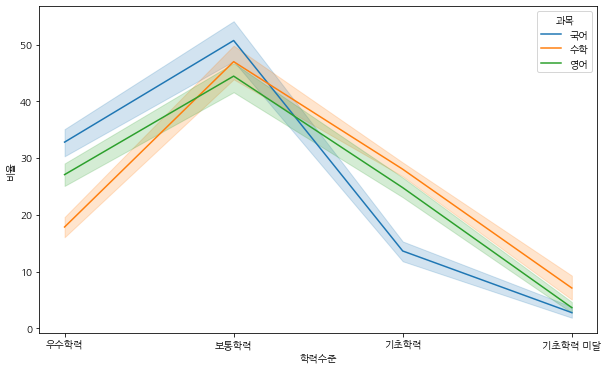

In [6]:
plt.figure(figsize=(10,6))
sns.lineplot(data=mid_achieve_all, x='학력수준', y='비율', hue="과목")

In [7]:
mid_4 = mid_achieve_all[mid_achieve_all['학력수준'] == '우수학력'].reset_index(drop=True)
mid_3 = mid_achieve_all[mid_achieve_all['학력수준'] == '보통학력'].reset_index(drop=True)
mid_43 = pd.merge(mid_4, mid_3, on=['연도', '과목'])
mid_43['보통이상'] = mid_43['비율_x'] + mid_43['비율_y']
mid_43 = mid_43[['연도', '과목', '보통이상']].reset_index(drop=True)

mid_2 = mid_achieve_all[mid_achieve_all['학력수준'] == '기초학력'].reset_index(drop=True)
mid_1 = mid_achieve_all[mid_achieve_all['학력수준'] == '기초학력 미달'].reset_index(drop=True)
mid_21 = pd.merge(mid_2, mid_1, on=['연도', '과목'])
mid_21['기초이하'] = mid_21['비율_x'] + mid_21['비율_y']
mid_21 = mid_21[['연도', '과목', '기초이하']]

mid_grade = pd.merge(mid_43, mid_21, on=['연도', '과목'])
mid_grade.head()

,연도,과목,보통이상,기초이하
0,2011,국어,81.3,18.6
1,2012,국어,83.6,16.2
2,2013,국어,86.2,13.8
3,2014,국어,87.3,12.7
4,2015,국어,82.5,17.4


In [8]:
mid_grade['우수학력'] = mid_4['비율'] 
mid_grade['보통학력'] = mid_3['비율'] 
mid_grade['기초학력'] = mid_2['비율'] 
mid_grade['기초학력 미달'] = mid_1['비율']
mid_grade.head()

,연도,과목,보통이상,기초이하,우수학력,보통학력,기초학력,기초학력 미달
0,2011,국어,81.3,18.6,31.0,50.3,17.2,1.4
1,2012,국어,83.6,16.2,31.1,52.5,15.2,1.0
2,2013,국어,86.2,13.8,30.0,56.2,12.6,1.2
3,2014,국어,87.3,12.7,26.5,60.8,10.7,2.0
4,2015,국어,82.5,17.4,30.2,52.3,14.8,2.6


Text(0.5, 1.0, '2011~2020 중학생 학업성취도(기초학력 미달)')

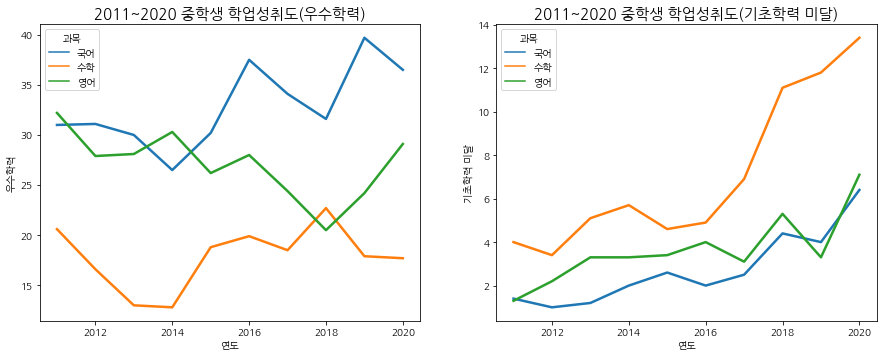

In [148]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=mid_grade, x='연도', y='우수학력', hue='과목', linewidth=2.5)
plt.title('2011~2020 중학생 학업성취도(우수학력)', fontsize=15)

plt.subplot(222)
sns.lineplot(data=mid_grade, x='연도', y='기초학력 미달', hue='과목', linewidth=2.5)
plt.title('2011~2020 중학생 학업성취도(기초학력 미달)', fontsize=15)

Text(0.5, 1.0, '2011~2020 중학생 학업성취도(기초이하)')

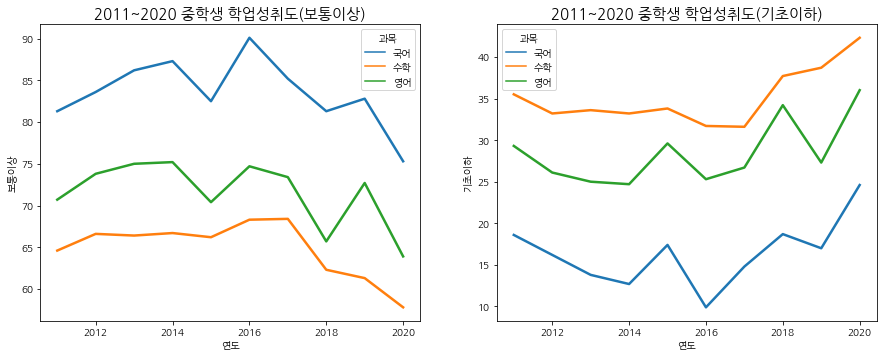

In [9]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=mid_grade, x='연도', y='보통이상', hue='과목', linewidth=2.5)
plt.title('2011~2020 중학생 학업성취도(보통이상)', fontsize=15)

plt.subplot(222)
sns.lineplot(data=mid_grade, x='연도', y='기초이하', hue='과목', linewidth=2.5)
plt.title('2011~2020 중학생 학업성취도(기초이하)', fontsize=15)

In [10]:
mid_grade.to_csv('dataset_eda/중학생 학업성취도(학력수준별).csv', index=False)
mid_achieve_all.to_csv('dataset_eda/중학생 학업성취도(melt).csv', index=False)

### 고등학교 학업 성취도 평가 EDA

In [11]:
tmp = pd.read_excel(file_names[0], sheet_name=sheets)

high_achieve_all = tmp[sheets[0]]
high_achieve_sex = tmp[sheets[1]]
high_achieve_region = tmp[sheets[2]]

In [12]:
high_achieve_all = high_achieve_all.melt(id_vars=['학력수준', '연도'], var_name='과목', value_name='비율')
high_achieve_all.head()

,학력수준,연도,과목,비율
0,우수학력,2011,국어,33.0
1,우수학력,2012,국어,29.6
2,우수학력,2013,국어,31.1
3,우수학력,2014,국어,33.7
4,우수학력,2015,국어,28.3


<AxesSubplot:xlabel='학력수준', ylabel='비율'>

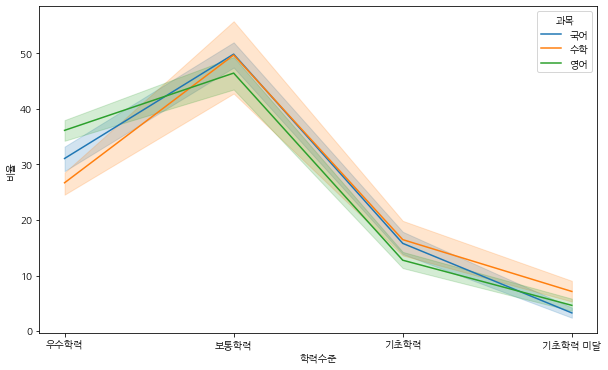

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(data=high_achieve_all, x='학력수준', y='비율', hue="과목")

In [14]:
high_4 = high_achieve_all[high_achieve_all['학력수준'] == '우수학력'].reset_index(drop=True)
high_3 = high_achieve_all[high_achieve_all['학력수준'] == '보통학력'].reset_index(drop=True)
high_43 = pd.merge(high_4, high_3, on=['연도', '과목'])
high_43['보통이상'] = high_43['비율_x'] + high_43['비율_y']
high_43 = high_43[['연도', '과목', '보통이상']].reset_index(drop=True)

high_2 = high_achieve_all[high_achieve_all['학력수준'] == '기초학력'].reset_index(drop=True)
high_1 = high_achieve_all[high_achieve_all['학력수준'] == '기초학력 미달'].reset_index(drop=True)
high_21 = pd.merge(high_2, high_1, on=['연도', '과목'])
high_21['기초이하'] = high_21['비율_x'] + high_21['비율_y']
high_21 = high_21[['연도', '과목', '기초이하']]

high_grade = pd.merge(high_43, high_21, on=['연도', '과목'])
high_grade.head()

,연도,과목,보통이상,기초이하
0,2011,국어,85.1,14.9
1,2012,국어,83.5,16.5
2,2013,국어,83.8,16.3
3,2014,국어,86.5,13.5
4,2015,국어,81.2,18.8


In [15]:
high_grade['우수학력'] = high_4['비율'] 
high_grade['보통학력'] = high_3['비율'] 
high_grade['기초학력'] = high_2['비율'] 
high_grade['기초학력 미달'] = high_1['비율']
high_grade.head()

,연도,과목,보통이상,기초이하,우수학력,보통학력,기초학력,기초학력 미달
0,2011,국어,85.1,14.9,33.0,52.1,12.9,2.0
1,2012,국어,83.5,16.5,29.6,53.9,14.4,2.1
2,2013,국어,83.8,16.3,31.1,52.7,13.5,2.8
3,2014,국어,86.5,13.5,33.7,52.8,12.2,1.3
4,2015,국어,81.2,18.8,28.3,52.9,16.2,2.6


Text(0.5, 1.0, '2011~2020 고등학생 학업성취도(기초학력 미달)')

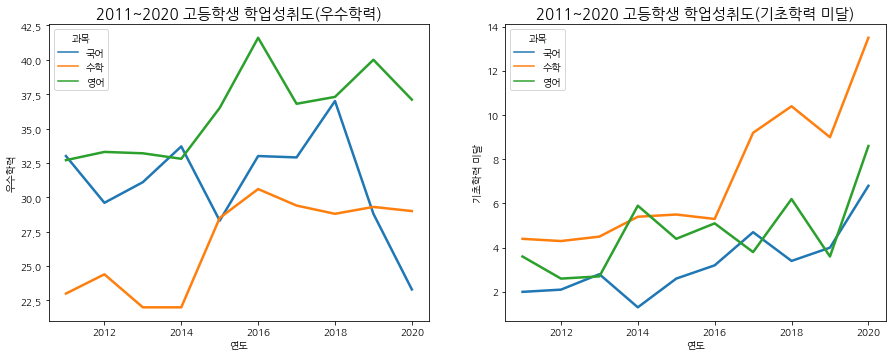

In [149]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=high_grade, x='연도', y='우수학력', hue='과목',
             palette="tab10", linewidth=2.5)
plt.title('2011~2020 고등학생 학업성취도(우수학력)', fontsize=15)


plt.subplot(222)
sns.lineplot(data=high_grade, x='연도', y='기초학력 미달', hue='과목',
             palette="tab10", linewidth=2.5)
plt.title('2011~2020 고등학생 학업성취도(기초학력 미달)', fontsize=15)

Text(0.5, 1.0, '2011~2020 고등학생 학업성취도(기초이하)')

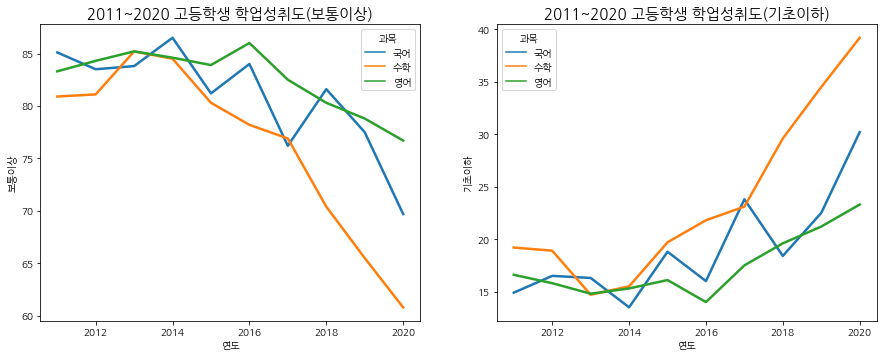

In [16]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=high_grade, x='연도', y='보통이상', hue='과목',
             palette="tab10", linewidth=2.5)
plt.title('2011~2020 고등학생 학업성취도(보통이상)', fontsize=15)


plt.subplot(222)
sns.lineplot(data=high_grade, x='연도', y='기초이하', hue='과목',
             palette="tab10", linewidth=2.5)
plt.title('2011~2020 고등학생 학업성취도(기초이하)', fontsize=15)



In [17]:
high_grade.to_csv('dataset_eda/고등학생 학업성취도(학력수준별).csv', index=False)
high_achieve_all.to_csv('dataset_eda/고등학생 학업성취도(melt).csv', index=False)

## 2011 ~ 2020 사교육 EDA

### 지역별 1인당 월평균 사교육비

In [18]:
region_mean = pd.read_csv('dataset/지역별_학생_1인당_월평균_사교육비_20221019130726.csv', 
                          encoding='cp949')
region_mean.head()

,항목,과목 및 유형,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,서 울 (만원),사교육비,32.8,31.2,32.8,33.5,33.8,35.2,39.1,41.1,45.1,45.3,52.9
1,서 울 (만원),국 어,2.7,2.4,2.3,2.3,2.3,2.5,3.0,3.2,3.5,4.1,4.8
2,서 울 (만원),영 어,10.8,10.1,11.3,11.2,11.2,10.7,11.1,12.0,13.0,13.7,15.7
3,서 울 (만원),수 학,9.6,10.4,10.4,10.8,10.6,10.8,11.7,11.9,12.6,14.1,15.5
4,서 울 (만원),"사회, 과학",1.7,1.7,1.1,1.2,1.3,1.6,1.8,1.8,2.1,2.5,2.7


In [19]:
region_mean['과목 및 유형'] = region_mean['과목 및 유형'].map(lambda x : x.replace(' ',''))
region_mean['과목 및 유형'].unique()

array(['사교육비', '국어', '영어', '수학', '사회,과학', '논술', '컴퓨터', '제2외국어,한문등', '음악',
       '미술', '체육', '취미·교양'], dtype=object)

In [20]:
region_mean = region_mean.melt(id_vars=['항목', '과목 및 유형'], var_name='연도', value_name='월평균')
region_mean

,항목,과목 및 유형,연도,월평균
0,서 울 (만원),사교육비,2011,32.8
1,서 울 (만원),국어,2011,2.7
2,서 울 (만원),영어,2011,10.8
3,서 울 (만원),수학,2011,9.6
4,서 울 (만원),"사회,과학",2011,1.7
...,...,...,...,...
523,읍면지역 (만원),"제2외국어,한문등",2021,0.3
524,읍면지역 (만원),음악,2021,2.0
525,읍면지역 (만원),미술,2021,1.0
526,읍면지역 (만원),체육,2021,2.8


In [21]:
region_mean['연도'] = region_mean['연도'].astype(int)
region_mean['월평균'] = region_mean['월평균'].astype(str).map(lambda x : x.replace('-', '0')).astype(float)

In [22]:
region_major_mean = region_mean[(region_mean['과목 및 유형']=='국어')
                                | (region_mean['과목 및 유형']=='수학')
                                | (region_mean['과목 및 유형']=='영어')].reset_index(drop=True)

Text(0.5, 1.0, '2011~2020 지역별 월평균 국영수 사교육비')

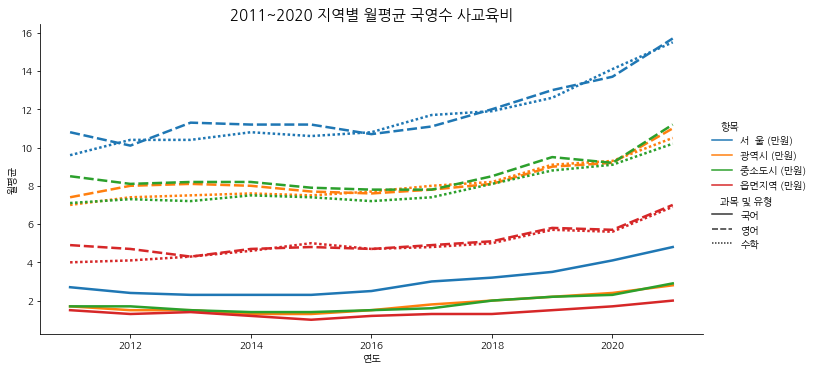

In [23]:

sns.relplot(data=region_major_mean, x='연도', y='월평균',
            hue='항목', style="과목 및 유형", kind="line", linewidth=2.5, aspect=2)
plt.title('2011~2020 지역별 월평균 국영수 사교육비', fontsize=15)


Text(0.5, 1.0, '2011~2020 지역별 월평균 영어 사교육비')

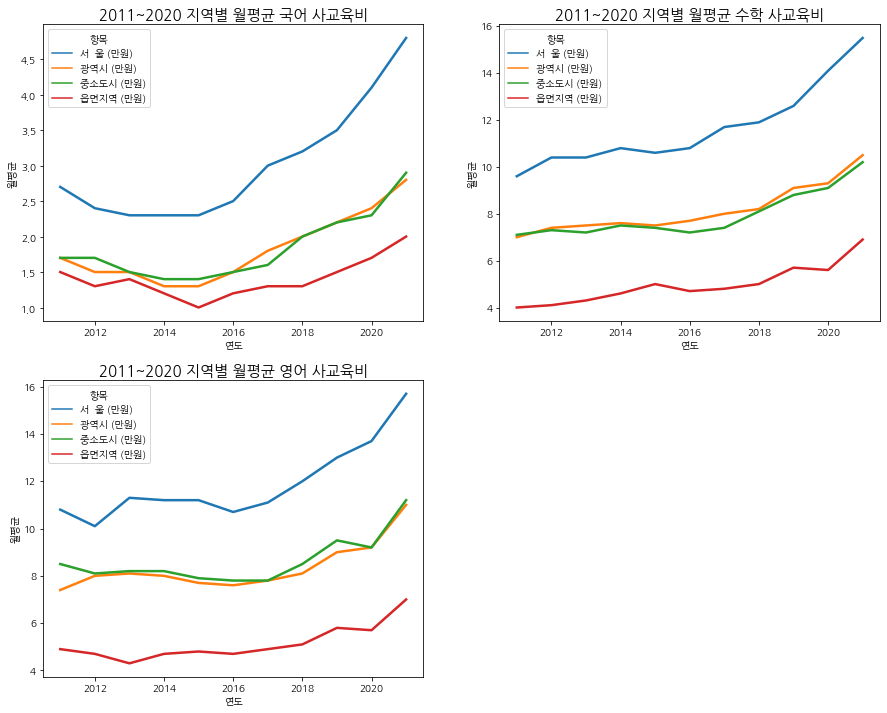

In [24]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=region_major_mean[region_major_mean['과목 및 유형']=='국어'], x='연도', y='월평균',
            hue='항목', linewidth=2.5)
plt.title('2011~2020 지역별 월평균 국어 사교육비', fontsize=15)


plt.subplot(222)
sns.lineplot(data=region_major_mean[region_major_mean['과목 및 유형']=='수학'], x='연도', y='월평균',
            hue='항목', linewidth=2.5)
plt.title('2011~2020 지역별 월평균 수학 사교육비', fontsize=15)


plt.subplot(223)
sns.lineplot(data=region_major_mean[region_major_mean['과목 및 유형']=='영어'], x='연도', y='월평균',
            hue='항목', linewidth=2.5)
plt.title('2011~2020 지역별 월평균 영어 사교육비', fontsize=15)


### 전국, 서울 과목별 사교육 참여율

In [25]:
df_ratio = pd.read_csv('dataset/지역_및_과목별_사교육_참여율_20221019141852.csv',
                       encoding='cp949')
df_ratio['과목 및 유형'] = df_ratio ['과목 및 유형'].map(lambda x : x.replace(' ',''))
df_ratio['항목'] = df_ratio['항목'].map(lambda x : x.replace(' ','').replace('(%)',''))
df_ratio = pd.melt(df_ratio, id_vars=['항목','과목 및 유형'], var_name = '시점', value_name = '참여율').set_axis(['기준','과목','연도','참여율'],axis='columns')
df_ratio['연도'] = df_ratio['연도'].astype(int)
df_ratio['참여율'] = df_ratio['참여율'].astype(str).map(lambda x : x.replace('-', '0')).astype(float)
df_ratio.head()

,기준,과목,연도,참여율
0,평균,사교육참여,2011,71.7
1,평균,국어,2011,26.2
2,평균,영어,2011,49.2
3,평균,수학,2011,50.2
4,평균,"사회,과학",2011,17.0


In [26]:
major_ratio = df_ratio[(df_ratio['과목']=='국어') 
                       | (df_ratio['과목']=='수학')
                       | (df_ratio['과목']=='영어') ].reset_index(drop=True)

major_ratio.shape

(66, 4)

Text(0.5, 1.0, '2011~2020 전국, 서울 국영수 사교육 참여율')

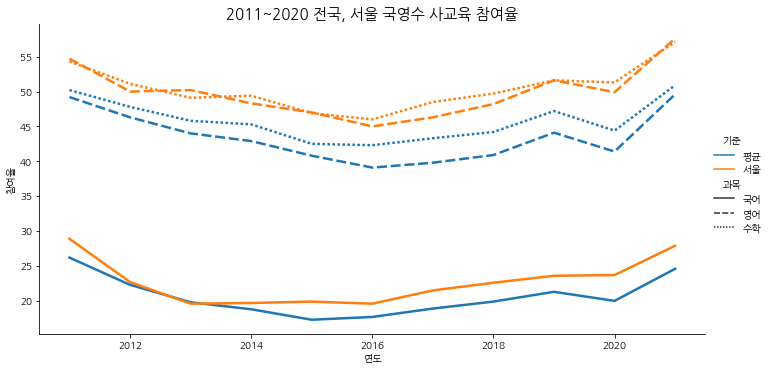

In [27]:
sns.relplot(data=major_ratio, x='연도', y='참여율',
            hue='기준', style="과목", kind="line", linewidth=2.5, aspect=2)
plt.title('2011~2020 전국, 서울 국영수 사교육 참여율', fontsize=15)

Text(0.5, 1.0, '2011~2020 전국, 서울 영어 사교육 참여율')

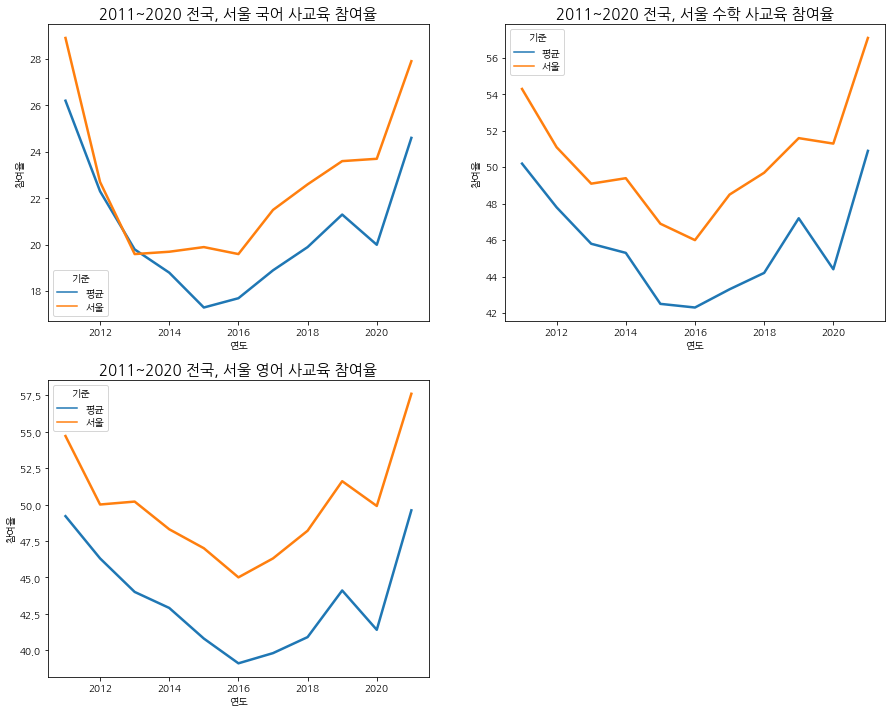

In [28]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=major_ratio[major_ratio['과목']=='국어'], x='연도', y='참여율',
            hue='기준', linewidth=2.5)
plt.title('2011~2020 전국, 서울 국어 사교육 참여율', fontsize=15)

plt.subplot(222)
sns.lineplot(data=major_ratio[major_ratio['과목']=='수학'], x='연도', y='참여율',
            hue='기준', linewidth=2.5)
plt.title('2011~2020 전국, 서울 수학 사교육 참여율', fontsize=15)

plt.subplot(223)
sns.lineplot(data=major_ratio[major_ratio['과목']=='영어'], x='연도', y='참여율',
            hue='기준', linewidth=2.5)
plt.title('2011~2020 전국, 서울 영어 사교육 참여율', fontsize=15)

# 2016년에 무슨 일이 일어났는가?
- 물가 상승

Text(0.5, 1.0, '2011~2020 중학생 학업성취도(기초이하)')

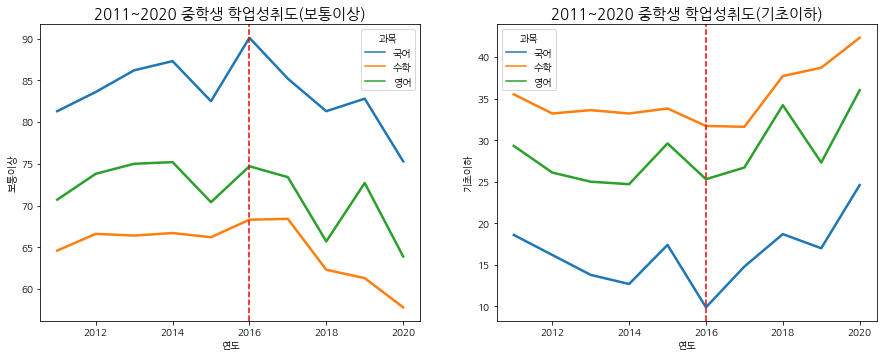

In [29]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=mid_grade, x='연도', y='보통이상', hue='과목', linewidth=2.5)
plt.axvline(x=2016, linestyle='--', color='r')
plt.title('2011~2020 중학생 학업성취도(보통이상)', fontsize=15)

plt.subplot(222)
sns.lineplot(data=mid_grade, x='연도', y='기초이하', hue='과목', linewidth=2.5)
plt.axvline(x=2016, linestyle='--', color='r')
plt.title('2011~2020 중학생 학업성취도(기초이하)', fontsize=15)

Text(0.5, 1.0, '2011~2020 고등학생 학업성취도(기초이하)')

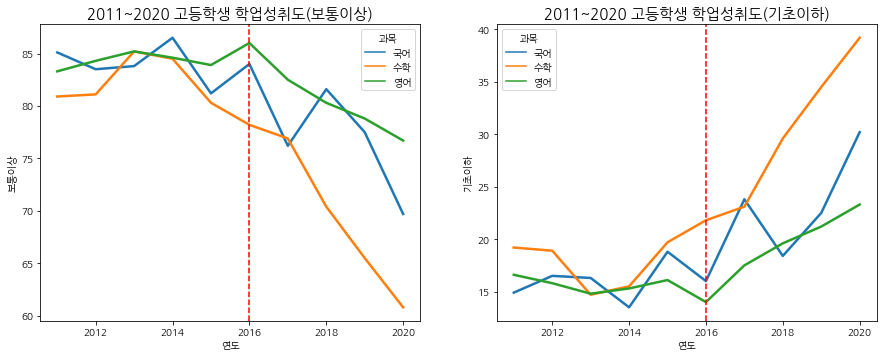

In [30]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=high_grade, x='연도', y='보통이상', hue='과목', linewidth=2.5)
plt.axvline(x=2016, linestyle='--', color='r')
plt.title('2011~2020 고등학생 학업성취도(보통이상)', fontsize=15)


plt.subplot(222)
sns.lineplot(data=high_grade, x='연도', y='기초이하', hue='과목', linewidth=2.5)
plt.axvline(x=2016, linestyle='--', color='r')
plt.title('2011~2020 고등학생 학업성취도(기초이하)', fontsize=15)

Text(0.5, 1.0, '2011~2020 지역별 월평균 영어 사교육비')

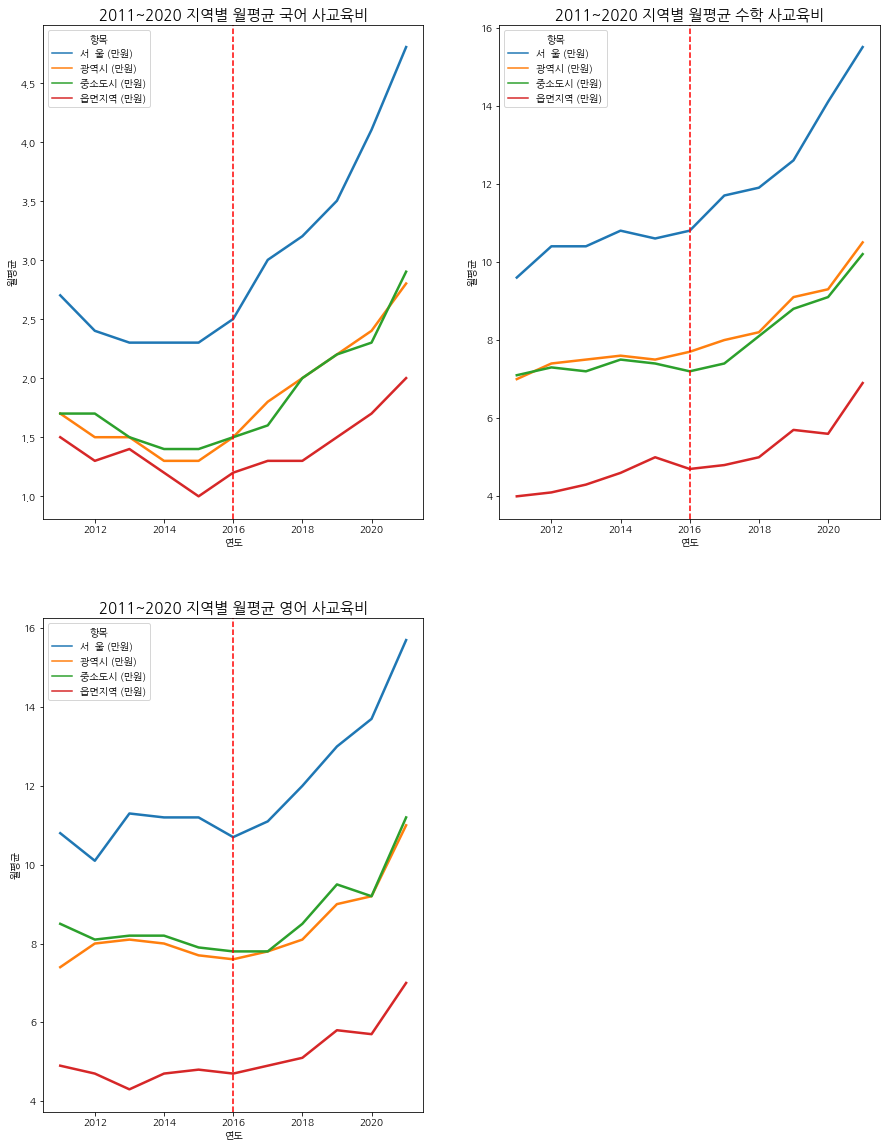

In [31]:
plt.figure(figsize=(15,20))
plt.subplot(221)
sns.lineplot(data=region_major_mean[region_major_mean['과목 및 유형']=='국어'], x='연도', y='월평균',
            hue='항목', linewidth=2.5)
plt.axvline(x=2016, linestyle='--', color='r')
plt.title('2011~2020 지역별 월평균 국어 사교육비', fontsize=15)


plt.subplot(222)
sns.lineplot(data=region_major_mean[region_major_mean['과목 및 유형']=='수학'], x='연도', y='월평균',
            hue='항목', linewidth=2.5)
plt.axvline(x=2016, linestyle='--', color='r')
plt.title('2011~2020 지역별 월평균 수학 사교육비', fontsize=15)


plt.subplot(223)
sns.lineplot(data=region_major_mean[region_major_mean['과목 및 유형']=='영어'], x='연도', y='월평균',
            hue='항목', linewidth=2.5)
plt.axvline(x=2016, linestyle='--', color='r')
plt.title('2011~2020 지역별 월평균 영어 사교육비', fontsize=15)


Text(0.5, 1.0, '2011~2020 전국, 서울 영어 사교육 참여율')

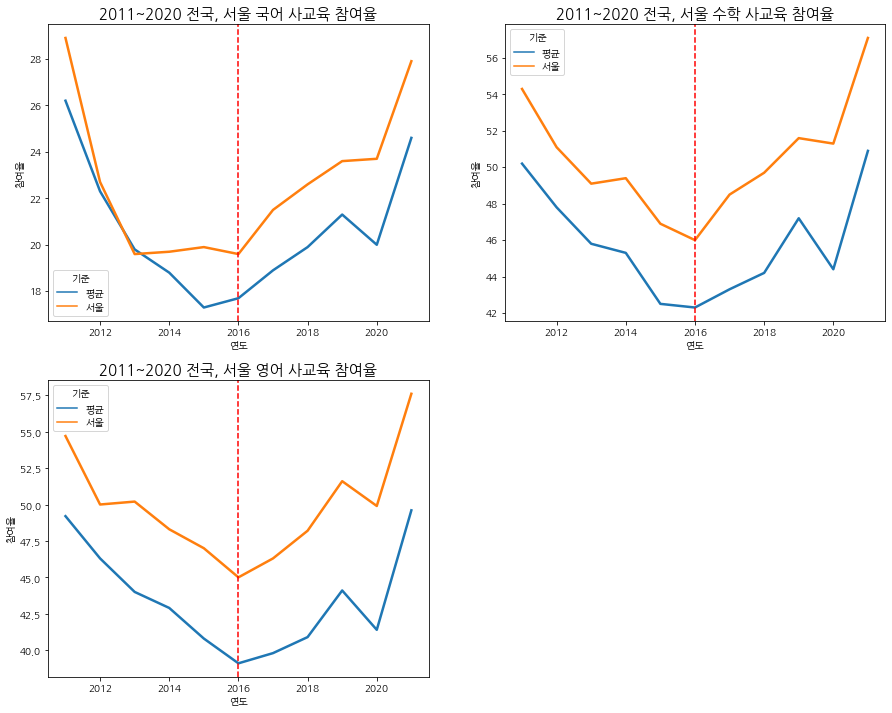

In [32]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=major_ratio[major_ratio['과목']=='국어'], x='연도', y='참여율',
            hue='기준', linewidth=2.5)
plt.axvline(x=2016, linestyle='--', color='r')
plt.title('2011~2020 전국, 서울 국어 사교육 참여율', fontsize=15)

plt.subplot(222)
sns.lineplot(data=major_ratio[major_ratio['과목']=='수학'], x='연도', y='참여율',
            hue='기준', linewidth=2.5)
plt.axvline(x=2016, linestyle='--', color='r')
plt.title('2011~2020 전국, 서울 수학 사교육 참여율', fontsize=15)

plt.subplot(223)
sns.lineplot(data=major_ratio[major_ratio['과목']=='영어'], x='연도', y='참여율',
            hue='기준', linewidth=2.5)
plt.axvline(x=2016, linestyle='--', color='r')
plt.title('2011~2020 전국, 서울 영어 사교육 참여율', fontsize=15)

In [33]:
tmp = '''2000
96.4%
3.4%
2001
95.1%
4.9%
2002
71.2%
28.8%
2003
69.0%
31.0%
2004
61.1%
38.9%
2005
55.7%
44.3%
2006
52.0%
48.0%
2007
48.5%
51.5%
2008
46.9%
53.1%
2009
43.3%
56.7%
2010
42.0%
58.0%
2011
39.1%
60.9%
2012
37.9%
62.1%
2013
37.1%
62.9%
2014
34.8%
65.2%
2015
35.8%
64.2%
2016
33.3%
66.7%
2017
30.1%
69.9%
2018
26.3%
73.7%
2019
23.8%
76.2%
2020
22.7%
77.3%
2021
23.0%
77.0%
2022
24.3%
75.7%
2023
22.0%
78.0%
2024
21.0%
79.0%'''


In [34]:
year = []
regular_decision = []
early_decision = []
for i, v in enumerate(tmp.split('\n')):
    if i % 3 == 0:
        year.append(int(v))
    elif i % 3 == 1:
        regular_decision.append(float(v.replace('%', '')))
    else:
        early_decision.append(float(v.replace('%', '')))
    

In [35]:
college_entrance = pd.DataFrame()
college_entrance['연도'] = year
college_entrance['정시 비율'] = regular_decision
college_entrance['수시 비율'] = early_decision
college_entrance

,연도,정시 비율,수시 비율
0,2000,96.4,3.4
1,2001,95.1,4.9
2,2002,71.2,28.8
3,2003,69.0,31.0
4,2004,61.1,38.9
5,2005,55.7,44.3
6,2006,52.0,48.0
7,2007,48.5,51.5
8,2008,46.9,53.1
9,2009,43.3,56.7


In [36]:
SNU_year = '''2022
(비율)
2021
(비율)
2020
(비율)
2019
(비율)
2018
(비율)
2017
(비율)
2016
(비율)
2015
(비율)
2014
(비율)
2013
(비율)
2012
(비율)
2011
(비율)
2010
(비율)
2009
(비율)
2008
(비율)
2007
(비율)
2006
(비율)
2005
(비율)
2004
(비율)
2003
(비율)
2002
(비율)'''

early = '''2,211
69.7
2,442
76.8
2,495
78.5
2,498
78.5
2,491
78.5
2,407
76.8
2,369
75.6
2,364
75.4
2,617
82.6
2,495
79.9
1,883
60.8
1,884
60.0
1,903
60.2
1,852
56.8
1,761
52.7
1,483
44.5
1,236
37.4
1,085
32.6
1,174
29.8
1,146
28.5
1,170
29.4'''

regular = '''960
30.3
736
23.2
684
21.5
684
21.5
684
21.5
729
23.2
766
24.4
771
24.6
552
17.4
629
20.1
1,213
39.2
1,258
40.0
1,258
39.8
1,409
43.2
1,579
47.3
1,852
55.5
2,069
62.6
2,242
67.4
2,772
70.2
2,871
71.5
2,804
70.6'''

all = '''3,171
100
3,178
100
3,179
100
3,182
100
3,175
100
3,136
100
3,135
100
3,135
100
3,169
100
3,124
100
3,096
100
3,142
100
3,161
100
3,261
100
3,340
100
3,335
100
3,305
100
3,327
100
3,946
100
4,017
100
3,974
100'''

In [37]:
SNU_entrance = pd.DataFrame()
SNU_entrance['연도'] = [int(v)-1 for i, v in enumerate(reversed(SNU_year.split('\n'))) if i % 2]
# SNU_entrance['서울대 입학 인원'] = [v for i, v in enumerate(reversed(all.replace(',','').split('\n'))) if i % 2]
# SNU_entrance['서울대 수시 인원'] = [v for i, v in enumerate(reversed(early.replace(',','').split('\n'))) if i % 2]
# SNU_entrance['서울대 정시 인원'] = [v for i, v in enumerate(reversed(regular.replace(',','').split('\n'))) if i % 2]
SNU_entrance['서울대 수시 비율'] = [float(v) for i, v in enumerate(reversed(early.split('\n'))) if i % 2 == 0]
SNU_entrance['서울대 정시 비율'] = [float(v) for i, v in enumerate(reversed(regular.split('\n'))) if i % 2 == 0]
SNU_entrance


,연도,서울대 수시 비율,서울대 정시 비율
0,2001,29.4,70.6
1,2002,28.5,71.5
2,2003,29.8,70.2
3,2004,32.6,67.4
4,2005,37.4,62.6
5,2006,44.5,55.5
6,2007,52.7,47.3
7,2008,56.8,43.2
8,2009,60.2,39.8
9,2010,60.0,40.0


In [38]:
entrance = pd.merge(college_entrance, SNU_entrance, on='연도')
entrance = entrance[entrance['연도'].isin(range(2011, 2021))].reset_index(drop=True)
entrance = entrance.set_index('연도')
entrance

,정시 비율,수시 비율,서울대 수시 비율,서울대 정시 비율
연도,,,,
2011,39.1,60.9,60.8,39.2
2012,37.9,62.1,79.9,20.1
2013,37.1,62.9,82.6,17.4
2014,34.8,65.2,75.4,24.6
2015,35.8,64.2,75.6,24.4
2016,33.3,66.7,76.8,23.2
2017,30.1,69.9,78.5,21.5
2018,26.3,73.7,78.5,21.5
2019,23.8,76.2,78.5,21.5


In [39]:
entrance.to_csv('dataset_eda/전국 및 서울대 수시정시비율.csv', index=False)

<AxesSubplot:xlabel='연도'>

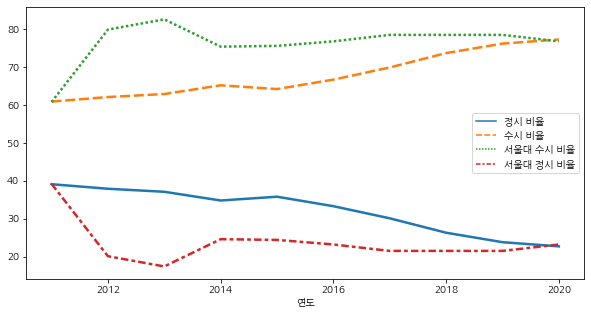

In [142]:
plt.figure(figsize=(10,5))
sns.lineplot(data=entrance, linewidth=2.5)
plt.title('')

### 서울 중고등학교 사교육비 및 사교육 참여율

In [41]:
file_path = glob("dataset/서울 사교육비 지출.csv")[0]
seoul_private_edu_cost_df = pd.read_csv(file_path)

# 컬럼 이름 변경
seoul_private_edu_cost_df.columns = ["연도", "1인당 월평균 사교육비(만원) : 평균", "평균 사교육 참여율(%)", 
                                     "1인당 월평균 사교육비(만원) : 초등학교", "초등 사교육 참여율(%)", 
                                     "1인당 월평균 사교육비(만원) : 중학교", "중등 사교육 참여율(%)", 
                                     "1인당 월평균 사교육비(만원) : 고등학교", "고등 사교육 참여율(%)", 
                                     "1인당 월평균 사교육비(만원) : 일반고", "일반고 사교육 참여율(%)"]

# 2011~2021년 외 데이터 삭제
seoul_private_edu_cost_df = seoul_private_edu_cost_df.drop([0, 1, 2])
seoul_private_edu_cost_df = seoul_private_edu_cost_df
seoul_private_edu_cost_df['연도'] = seoul_private_edu_cost_df['연도'].astype(int)
seoul_private_edu_cost_df = seoul_private_edu_cost_df.set_index('연도')
seoul_private_edu_cost_df = seoul_private_edu_cost_df.astype('float')
seoul_private_edu_cost_df

,1인당 월평균 사교육비(만원) : 평균,평균 사교육 참여율(%),1인당 월평균 사교육비(만원) : 초등학교,초등 사교육 참여율(%),1인당 월평균 사교육비(만원) : 중학교,중등 사교육 참여율(%),1인당 월평균 사교육비(만원) : 고등학교,고등 사교육 참여율(%),1인당 월평균 사교육비(만원) : 일반고,일반고 사교육 참여율(%)
연도,,,,,,,,,,
2011,32.8,77.0,30.4,87.7,31.8,73.4,37.4,64.2,42.7,71.2
2012,31.2,73.5,26.1,82.0,34.0,72.7,36.1,61.8,41.1,68.2
2013,32.8,75.0,28.4,84.8,34.9,74.7,37.1,61.6,42.7,68.4
2014,33.5,74.4,30.0,84.3,34.9,73.3,37.1,61.3,42.1,67.4
2015,33.8,74.3,29.6,82.9,35.5,74.1,38.3,61.8,43.6,68.2
2016,35.2,73.7,29.9,84.2,37.0,69.9,41.7,61.5,47.0,66.7
2017,39.1,77.6,34.1,86.5,41.7,76.0,44.5,65.5,51.8,72.6
2018,41.1,79.9,36.5,89.5,41.5,74.8,48.4,68.3,56.6,74.9
2019,45.1,80.0,38.5,87.6,46.3,77.2,55.6,68.9,65.2,77.3


In [42]:
seoul_private_edu_cost_df.columns

Index(['1인당 월평균 사교육비(만원) : 평균', '평균 사교육 참여율(%)', '1인당 월평균 사교육비(만원) : 초등학교',
       '초등 사교육 참여율(%)', '1인당 월평균 사교육비(만원) : 중학교', '중등 사교육 참여율(%)',
       '1인당 월평균 사교육비(만원) : 고등학교', '고등 사교육 참여율(%)', '1인당 월평균 사교육비(만원) : 일반고',
       '일반고 사교육 참여율(%)'],
      dtype='object')

In [43]:
seoul_high_middle_privat_edu = seoul_private_edu_cost_df[[
    '1인당 월평균 사교육비(만원) : 평균', '평균 사교육 참여율(%)', 
    '1인당 월평균 사교육비(만원) : 중학교', '1인당 월평균 사교육비(만원) : 고등학교',
    '중등 사교육 참여율(%)', '고등 사교육 참여율(%)']]
seoul_high_middle_privat_edu = seoul_high_middle_privat_edu.drop(2021)
seoul_high_middle_privat_edu

,1인당 월평균 사교육비(만원) : 평균,평균 사교육 참여율(%),1인당 월평균 사교육비(만원) : 중학교,1인당 월평균 사교육비(만원) : 고등학교,중등 사교육 참여율(%),고등 사교육 참여율(%)
연도,,,,,,
2011,32.8,77.0,31.8,37.4,73.4,64.2
2012,31.2,73.5,34.0,36.1,72.7,61.8
2013,32.8,75.0,34.9,37.1,74.7,61.6
2014,33.5,74.4,34.9,37.1,73.3,61.3
2015,33.8,74.3,35.5,38.3,74.1,61.8
2016,35.2,73.7,37.0,41.7,69.9,61.5
2017,39.1,77.6,41.7,44.5,76.0,65.5
2018,41.1,79.9,41.5,48.4,74.8,68.3
2019,45.1,80.0,46.3,55.6,77.2,68.9


<AxesSubplot:xlabel='연도'>

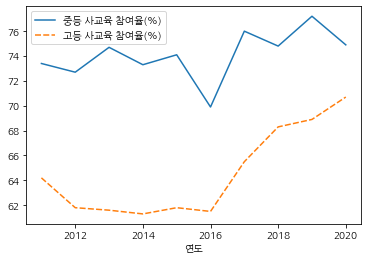

In [44]:
sns.lineplot(data=seoul_high_middle_privat_edu[['중등 사교육 참여율(%)', '고등 사교육 참여율(%)']])

<AxesSubplot:xlabel='연도'>

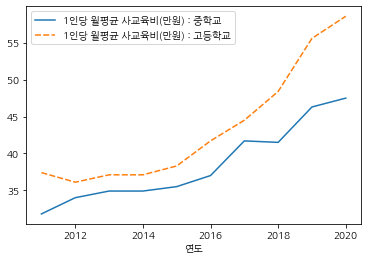

In [45]:
sns.lineplot(data=seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 중학교',
                                                '1인당 월평균 사교육비(만원) : 고등학교']])

### 상관관계

Text(0.5, 1.0, '사교육과 수시정시 비율 간의 상관관계')

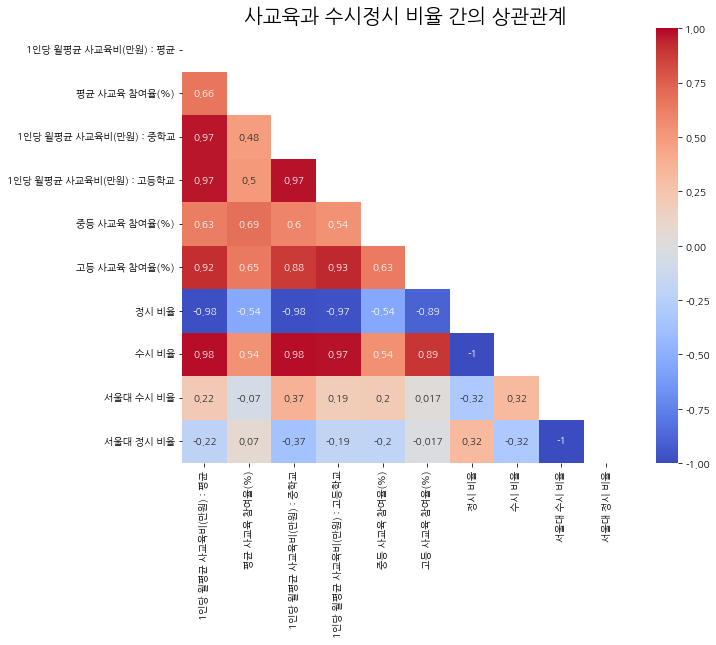

In [130]:
privat_edu_entrance = pd.concat([seoul_high_middle_privat_edu, entrance], axis=1)

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(privat_edu_entrance.corr()))
sns.heatmap(privat_edu_entrance.corr(), annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('사교육과 수시정시 비율 간의 상관관계', fontsize=20)

Text(0.5, 1.0, '2011~2020 사교육과 수시 비율')

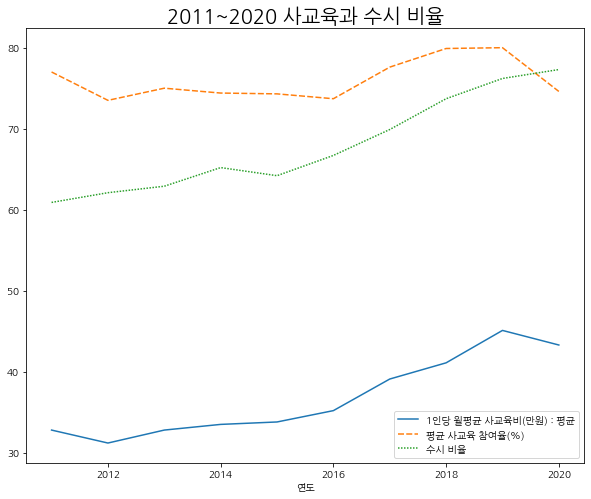

In [135]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=privat_edu_entrance[['1인당 월평균 사교육비(만원) : 평균', '평균 사교육 참여율(%)', '수시 비율']])
plt.title('2011~2020 사교육과 수시 비율', fontsize=20)

In [92]:
# 서울 내 국어 참여율과 월평균 비용
korean_seoul_mean = region_major_mean[(region_major_mean['항목'] == '서  울 (만원)') 
                                     & (region_major_mean['과목 및 유형'] == '국어')]

korean_seoul_ratio = major_ratio[(major_ratio['기준'] == '서울') & (major_ratio['과목'] == '국어')]

korean_seoul = pd.concat([korean_seoul_mean[['연도', '월평균']].set_index('연도'), 
                         korean_seoul_ratio[['연도', '참여율']].set_index('연도')], axis=1)

# 서울 내 수학 참여율과 월평균 비용
math_seoul_mean = region_major_mean[(region_major_mean['항목'] == '서  울 (만원)') 
                                    & (region_major_mean['과목 및 유형'] == '수학')]

math_seoul_ratio = major_ratio[(major_ratio['기준'] == '서울') & (major_ratio['과목'] == '수학')]

math_seoul = pd.concat([math_seoul_mean[['연도', '월평균']].set_index('연도'),
                        math_seoul_ratio[['연도', '참여율']].set_index('연도')], axis=1)

# 서울 내 영어 참여율과 월평균 비용
english_seoul_mean = region_major_mean[(region_major_mean['항목'] == '서  울 (만원)') 
                                     & (region_major_mean['과목 및 유형'] == '영어')]

english_seoul_ratio = major_ratio[(major_ratio['기준'] == '서울') & (major_ratio['과목'] == '영어')]

english_seoul = pd.concat([english_seoul_mean[['연도', '월평균']].set_index('연도'), 
                           english_seoul_ratio[['연도', '참여율']].set_index('연도')], axis=1)

Text(0.5, 1.0, '고등학교 국어 과목과 수시정시, 사교육의 상관관계')

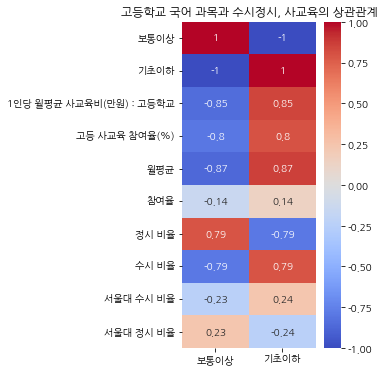

In [104]:
korean_high_grade = high_grade[high_grade['과목']=='국어'][['연도', '보통이상', '기초이하']].set_index('연도')
korean_high_grade = pd.concat([korean_high_grade,
                               seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 고등학교', 
                                                             '고등 사교육 참여율(%)']]], axis=1)
korean_high_grade = pd.concat([korean_high_grade, korean_seoul], axis=1)
korean_high_grade = pd.concat([korean_high_grade, entrance], axis=1)



plt.figure(figsize=(3, 6))
sns.heatmap(korean_high_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('고등학교 국어 과목과 수시정시, 사교육의 상관관계', fontsize=12)

Text(0.5, 1.0, '고등학교 수학 과목과 수시정시, 사교육의 상관관계')

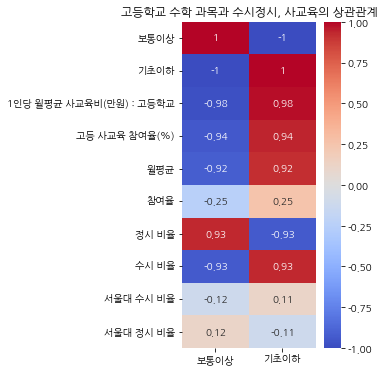

In [134]:
math_high_grade = high_grade[high_grade['과목']=='수학'][['연도', '보통이상', '기초이하']].set_index('연도')
math_high_grade = pd.concat([math_high_grade,
          seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 고등학교', '고등 사교육 참여율(%)']]],
          axis=1)
math_high_grade = pd.concat([math_high_grade, math_seoul], axis=1)
math_high_grade = pd.concat([math_high_grade, entrance], axis=1)

plt.figure(figsize=(3, 6))
sns.heatmap(math_high_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('고등학교 수학 과목과 수시정시, 사교육의 상관관계', fontsize=12)

Text(0.5, 1.0, '2011~2020 고등학생 수학 성취도')

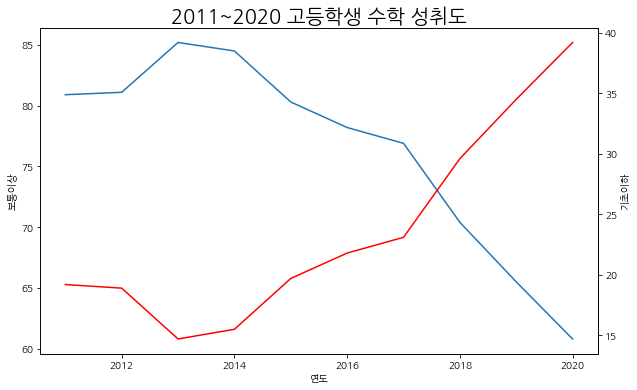

In [140]:
plt.figure(figsize=(10, 6))
pr_p = sns.lineplot(data=math_high_grade[['보통이상', '기초이하']], 
                    x="연도", y="보통이상", palette="Blue")
pr_c = pr_p.twinx()
pr_c = sns.lineplot(data=math_high_grade[['보통이상', '기초이하']],
                    x="연도", y="기초이하", color="Red")
plt.title('2011~2020 고등학생 수학 성취도', fontsize=20)

Text(0.5, 1.0, '고등학교 영어 과목과 수시정시, 사교육의 상관관계')

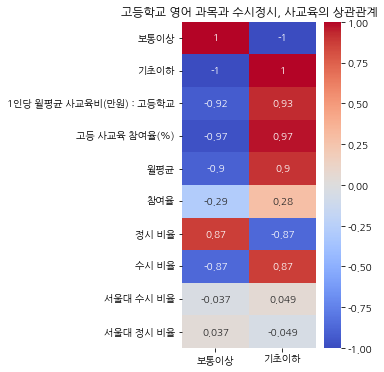

In [138]:
english_high_grade = high_grade[high_grade['과목']=='영어'][['연도', '보통이상', '기초이하']].set_index('연도')
english_high_grade = pd.concat([english_high_grade,
          seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 고등학교', '고등 사교육 참여율(%)']]],
          axis=1)
english_high_grade = pd.concat([english_high_grade, english_seoul], axis=1)
english_high_grade = pd.concat([english_high_grade, entrance], axis=1)

plt.figure(figsize=(3, 6))
sns.heatmap(english_high_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('고등학교 영어 과목과 수시정시, 사교육의 상관관계', fontsize=12)

Text(0.5, 1.0, '2011~2020 고등학생 영어 성취도')

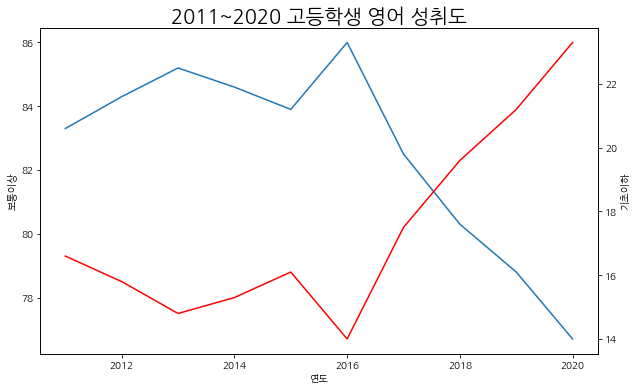

In [139]:
plt.figure(figsize=(10, 6))
pr_p = sns.lineplot(data=english_high_grade[['보통이상', '기초이하']], 
                    x="연도", y="보통이상", palette="Blue")
pr_c = pr_p.twinx()
pr_c = sns.lineplot(data=english_high_grade[['보통이상', '기초이하']],
                    x="연도", y="기초이하", color="Red")
plt.title('2011~2020 고등학생 영어 성취도', fontsize=20)

**중학교**

Text(0.5, 1.0, '중학교 국어 과목과 수시정시, 사교육의 상관관계')

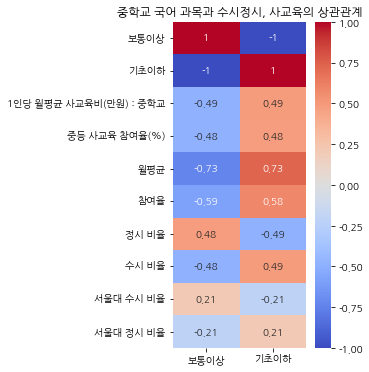

In [150]:
korean_mid_grade = mid_grade[mid_grade['과목']=='국어'][['연도', '보통이상', '기초이하']].set_index('연도')
korean_mid_grade = pd.concat([korean_mid_grade,
                               seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 중학교', 
                                                             '중등 사교육 참여율(%)']]], axis=1)
korean_mid_grade = pd.concat([korean_mid_grade, korean_seoul], axis=1)
korean_mid_grade = pd.concat([korean_mid_grade, entrance], axis=1)



plt.figure(figsize=(3, 6))
sns.heatmap(korean_mid_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('중학교 국어 과목과 수시정시, 사교육의 상관관계', fontsize=12)

Text(0.5, 1.0, '중학교 수학 과목과 수시정시, 사교육의 상관관계')

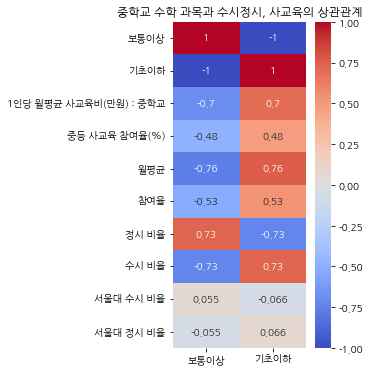

In [151]:
math_mid_grade = mid_grade[mid_grade['과목']=='수학'][['연도', '보통이상', '기초이하']].set_index('연도')
math_mid_grade = pd.concat([math_mid_grade,
                               seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 중학교', 
                                                             '중등 사교육 참여율(%)']]], axis=1)
math_mid_grade = pd.concat([math_mid_grade, math_seoul], axis=1)
math_mid_grade = pd.concat([math_mid_grade, entrance], axis=1)



plt.figure(figsize=(3, 6))
sns.heatmap(math_mid_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('중학교 수학 과목과 수시정시, 사교육의 상관관계', fontsize=12)

Text(0.5, 1.0, '영어 수학 과목과 수시정시, 사교육의 상관관계')

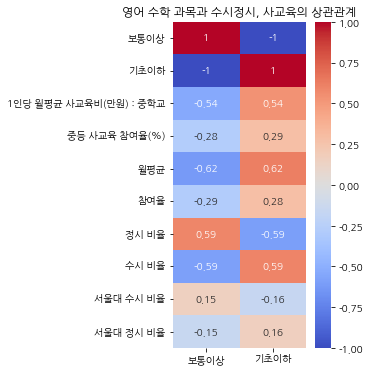

In [152]:
english_mid_grade = mid_grade[mid_grade['과목']=='영어'][['연도', '보통이상', '기초이하']].set_index('연도')
english_mid_grade = pd.concat([english_mid_grade,
                               seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 중학교', 
                                                             '중등 사교육 참여율(%)']]], axis=1)
english_mid_grade = pd.concat([english_mid_grade, math_seoul], axis=1)
english_mid_grade = pd.concat([english_mid_grade, entrance], axis=1)



plt.figure(figsize=(3, 6))
sns.heatmap(english_mid_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('영어 수학 과목과 수시정시, 사교육의 상관관계', fontsize=12)